<a href="https://colab.research.google.com/github/arsh1207/BigDataProject/blob/master/Content_based_recommendation_system_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Content Based recommendation system

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [37]:
!ls "/content/drive/My Drive/Colab Notebooks"

 anime.csv					   test_data_animes.csv
 Bike_Sharing.ipynb				   test_data_user.csv
 Classifier_Interpretability_Project.ipynb	   testfile2
 Content_based_recommendation_system_Colab.ipynb   training_data.csv
'Copy of Part1_TensorFlow.ipynb'		   Untitled0.ipynb
'Copy of Part2_Music_Generation.ipynb'		   Untitled1.ipynb
 rating.csv					   User_based_CF_colab.ipynb


In [49]:
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/anime.csv")
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


#### Exploring the data

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [40]:
df.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

#### For Cotent based recommender system we will be using { Name, Genre, Type} column

In [0]:
# preprocessing
# filling NaN "Type" with unknown
df.loc[(df['type'].isnull()), 'type'] = 'Unknown'
# filling NaN "Genre" with unknown
df.loc[(df['genre'].isnull()), 'genre'] = 'Unknown'

In [42]:
df.isnull().sum()

anime_id      0
name          0
genre         0
type          0
episodes      0
rating      230
members       0
dtype: int64

In [0]:
# Removing punctuation
#df['name'] = df['name'].str.replace('[^\w\s]','')
#df['name'].head()

In [51]:
# Dropping unwanted columns
df.drop(['rating', 'members', 'episodes'], axis=1, inplace=True)
df.head()

,anime_id,name,genre,type
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV


In [0]:
# Converting to lower case
df['genre'] = df['genre'].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [0]:
# tokenization of keywords
#from textblob import TextBlob
#df['genre'] = df['genre'].apply(lambda x: TextBlob(x).words)
#df['type'] = df['type'].apply(lambda x: TextBlob(x).words)
#df['episodes'] = df['episodes'].apply(lambda x: TextBlob(x).words)
#df.head()

In [0]:
df['bag_of_words'] = ""
df.loc[:,'bag_of_words'] = df.loc[:, 'genre'] +', '+ df.loc[:, 'type']

In [55]:
# Data after preprocessing
df.head()

,anime_id,name,genre,type,bag_of_words
0,32281,Kimi no Na wa.,"drama, romance, school, supernatural",Movie,"drama, romance, school, supernatural, Movie"
1,5114,Fullmetal Alchemist: Brotherhood,"action, adventure, drama, fantasy, magic, mili...",TV,"action, adventure, drama, fantasy, magic, mili..."
2,28977,Gintama°,"action, comedy, historical, parody, samurai, s...",TV,"action, comedy, historical, parody, samurai, s..."
3,9253,Steins;Gate,"sci-fi, thriller",TV,"sci-fi, thriller, TV"
4,9969,Gintama&#039;,"action, comedy, historical, parody, samurai, s...",TV,"action, comedy, historical, parody, samurai, s..."


### Using sklearn TFIDF implementation

In [0]:
vectorizer = TfidfVectorizer()
tfidf = vectorizer.fit_transform(df["bag_of_words"])

In [0]:
bag = vectorizer.get_feature_names()

In [0]:
# Using Cosine to obtain similaritier between two animes
cosine_sim = cosine_similarity(tfidf, tfidf)

In [18]:
cosine_sim.shape

(12294, 12294)

In [0]:
# recommender function
def recommendation(name, cosine_sim):
    recommended = np.array([])
    index_ = df.loc[(df['name'] == name)].index
    score = cosine_sim[index_]
    ind = np.argpartition(score[0], -10)[-11:]
    ind = ind[np.argsort(score[0][ind])]
    print(score[0][ind])
    #for i in ind:
     #   recommended = np.append(recommended, df.loc[(df.index == i)]['name'])        
    return ind

In [20]:
# Predicting movies similar to "Fairy Tail"
indices = recommendation('Fairy Tail', cosine_sim)
print(indices)
df[['anime_id','name', 'genre', 'type']].loc[indices]

[0.9394034  0.9394034  0.9394034  0.9394034  0.96155633 0.96155633
 0.96155633 0.96155633 0.96155633 1.         1.        ]
[ 1854   959  3592  2524 10953   290   101   268   795   255   288]


,anime_id,name,genre,type
1854,332,Dokidoki Densetsu: Mahoujin Guru Guru,"adventure, comedy, fantasy, magic, shounen",TV
959,331,Mahoujin Guru Guru,"adventure, comedy, fantasy, magic, shounen",TV
3592,1018,Majutsushi Orphen: Revenge,"adventure, comedy, fantasy, magic, shounen",TV
2524,1164,Mahou Senshi Louie,"adventure, comedy, fantasy, magic, shounen",TV
10953,28833,Chain Chronicle: Haecceitas no Hikari,"action, adventure, fantasy, magic, shounen",TV
290,31741,Magi: Sinbad no Bouken (TV),"action, adventure, fantasy, magic, shounen",TV
101,18115,Magi: The Kingdom of Magic,"action, adventure, fantasy, magic, shounen",TV
268,14513,Magi: The Labyrinth of Magic,"action, adventure, fantasy, magic, shounen",TV
795,8086,Densetsu no Yuusha no Densetsu,"action, adventure, fantasy, magic, shounen",TV
255,22043,Fairy Tail (2014),"action, adventure, comedy, fantasy, magic, sho...",TV


## TF - IDF implementation without library

In [21]:
# Calculating TF
tf = df['bag_of_words'].apply(lambda x: pd.value_counts(x.split(","))).sum(axis = 0).reset_index()
tf.columns = ['words','tf']

# removing duplicate words
for i,word1 in enumerate(tf['words']):
    tf.loc[i, 'words']= word1.strip()
tf2 = {}
for i,word1 in enumerate(tf['words']):
    if word1 not in tf2.keys():
        tf2[word1] = tf.loc[i, 'tf']
    else:
        tf2[word1] += tf.loc[i, 'tf']
tf = pd.DataFrame.from_dict(tf2, orient='index').reset_index()
tf.columns = ['words','tf']
tf.head()

,words,tf
0,Movie,2348.0
1,supernatural,1037.0
2,romance,1464.0
3,school,1220.0
4,drama,2016.0


In [0]:
# Calculating IDF
N = df.shape[0]
idf = {}
for i,word in enumerate(tf['words']):
    tf.loc[i, 'idf'] = np.log(N/(len(df[df['bag_of_words'].str.contains(word)])))
    idf[word] = np.log(N/(len(df[df['bag_of_words'].str.contains(word)])))


In [23]:
# Creating tfidf vectors
tff = pd.DataFrame(columns=tf['words'])
for i in range(N):
    dict_ = dict.fromkeys(tf['words'], 0)
    for word in df['bag_of_words'][i].split(", "):
        dict_[word] = (1/len(df['bag_of_words'][i].split(", "))) * idf[word]
    tff = tff.append(dict_, ignore_index=True)
tff.head()

words,Movie,supernatural,romance,school,drama,adventure,action,shounen,magic,military,TV,fantasy,samurai,parody,comedy,sci-fi,historical,thriller,sports,super power,OVA,space,slice of life,mecha,music,seinen,mystery,martial arts,vampire,shoujo,psychological,police,horror,Special,demons,ecchi,josei,shounen ai,game,dementia,harem,Music,cars,ONA,kids,shoujo ai,unknown,Unknown,hentai,yaoi,yuri
0,0.331109,0.494556,0.425588,0.462052,0.361599,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.000000,0.000000,0.225999,0.206943,0.182944,0.241843,0.345018,0.420303,0.147192,0.209037,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.182944,0.241843,0.000000,0.000000,0.147192,0.000000,0.552457,0.4257,0.121665,0.222695,0.340598,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.392512,0.000000,0.000000,0.0000,0.000000,0.593854,0.000000,1.650319,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.182944,0.241843,0.000000,0.000000,0.147192,0.000000,0.552457,0.4257,0.121665,0.222695,0.340598,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
cosine_sim_ = cosine_similarity(tff, tff)

### Comparing both with and without library tfidf implementation and recommending on the basis of contents

In [25]:
# Predicting movies similar to "Fairy Tail"
indices = recommendation('Fairy Tail', cosine_sim_)
print(indices)
df[['anime_id','name', 'genre', 'type']].loc[indices]

[0.94857288 0.94857288 0.94857288 0.94857288 0.97758854 0.97758854
 0.97758854 0.97758854 0.97758854 1.         1.        ]
[ 2524  1854  3592   959   101   268   795 10953   290   288   255]


,anime_id,name,genre,type
2524,1164,Mahou Senshi Louie,"adventure, comedy, fantasy, magic, shounen",TV
1854,332,Dokidoki Densetsu: Mahoujin Guru Guru,"adventure, comedy, fantasy, magic, shounen",TV
3592,1018,Majutsushi Orphen: Revenge,"adventure, comedy, fantasy, magic, shounen",TV
959,331,Mahoujin Guru Guru,"adventure, comedy, fantasy, magic, shounen",TV
101,18115,Magi: The Kingdom of Magic,"action, adventure, fantasy, magic, shounen",TV
268,14513,Magi: The Labyrinth of Magic,"action, adventure, fantasy, magic, shounen",TV
795,8086,Densetsu no Yuusha no Densetsu,"action, adventure, fantasy, magic, shounen",TV
10953,28833,Chain Chronicle: Haecceitas no Hikari,"action, adventure, fantasy, magic, shounen",TV
290,31741,Magi: Sinbad no Bouken (TV),"action, adventure, fantasy, magic, shounen",TV
288,6702,Fairy Tail,"action, adventure, comedy, fantasy, magic, sho...",TV


## Creating user profile and recommending movies 

In [0]:
user_ratings = pd.read_csv("/content/drive/My Drive/Colab Notebooks/rating.csv")

In [27]:
user_ratings.groupby(user_ratings["rating"]).count()

,user_id,anime_id
rating,,
-1,1476496,1476496
1,16649,16649
2,23150,23150
3,41453,41453
4,104291,104291
5,282806,282806
6,637775,637775
7,1375287,1375287
8,1646019,1646019


In [28]:
# dropping missing ratings
user_ratings.drop(user_ratings[user_ratings['rating']==-1].index, axis=0, inplace=True)
user_ratings.groupby(user_ratings["rating"]).count()

,user_id,anime_id
rating,,
1,16649,16649
2,23150,23150
3,41453,41453
4,104291,104291
5,282806,282806
6,637775,637775
7,1375287,1375287
8,1646019,1646019
9,1254096,1254096


In [0]:
import random
# Using the same test data that is generated in Collaborative filtering for comparing the results
def get_test_data():    
    
    # test_data_users = [36112, 23604, 26867, 30558, 55900, 21256, 40027, 67337, 69934, 61587, 18357, 16907, 57904, 69741, 14220, 37539, 53879, 45611, 50095, 53348, 36318, 8157, 29255, 67689, 57239, 7740, 12496, 27932, 60977, 36703, 8520, 62520, 46291, 41439, 27950, 71103, 70437, 27763, 64931, 49575, 12316, 14039, 13887, 11891, 1133, 58817, 58038, 23077, 6422, 36364]
    #test_data_users = [11521, 45871, 70274, 60731, 19653, 21230, 70563, 11163, 35496, 51674, 23249, 15541, 33002, 36471, 28337, 39803, 1432, 24922, 73095, 71949, 37560, 58721, 52680, 17296, 35718, 42575, 68679, 66509, 3485, 32221, 38639, 58334, 10998, 2091, 54514, 40496, 24249, 68323, 35260, 52097, 39764, 48308, 3489, 39302, 67475, 53802, 60389, 68410, 39602, 59321, 403, 71247, 31777, 32379, 47386, 28084, 72261, 4943, 33479, 34479, 37512, 30349, 3332, 27704, 65459, 32112, 62150, 12631, 60859, 57055, 1631, 31091, 39491, 23546, 37900, 14700, 65089, 41681, 46301, 71870, 16658, 12773, 1032, 41447, 60860, 17883, 44579, 46187, 57520, 6088, 7143, 64273, 55373, 2902, 32307, 33449, 18250, 63814, 62592, 67245]
    #test_data_users = [11521, 45871, 70274, 60731, 19653, 21230, 70563, 11163, 35496, 51674, 23249, 15541, 33002, 36471, 28337, 39803, 1432, 24922, 73095, 71949, 37560, 58721, 52680, 17296, 35718, 42575, 68679, 66509, 3485]
    test_data_users = pd.read_csv("/content/drive/My Drive/Colab Notebooks/test_data_user.csv")
    test_data_animes = pd.read_csv("/content/drive/My Drive/Colab Notebooks/test_data_animes.csv")
    return test_data_users["user_id"].to_list(), test_data_animes['test_animes'].to_list()

In [0]:
# Splitting data into train test sets
def prepare_data(test_user, test_animes):
    training_data = user_ratings.copy(deep=True)
    #dropping test data
    for user in test_user:       
        for anime in training_data.loc[training_data['user_id']==user]['anime_id'].values:
            if anime in test_animes:
                training_data.loc[training_data['user_id']==user].drop(training_data.loc[training_data['user_id']==user][training_data.loc[training_data['user_id']==user]['anime_id']==anime].index, axis=0, inplace=True)
    return training_data

Text(0, 0.5, 'Frequency')

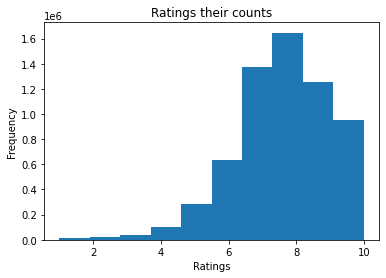

In [31]:
# create figure and axis
fig, ax = plt.subplots()
ax.hist(user_ratings['rating'])
ax.set_title('Ratings their counts')
ax.set_xlabel('Ratings')
ax.set_ylabel('Frequency')

In [0]:
def create_user_profile(user, train_data):
    data = train_data.loc[train_data['user_id']==user]
    mean = data.mean()['rating']
    # data['likeness'] = 0
    data = data.assign(likeness=0)
    data.loc[:, "likeness"] = data.loc[:, "rating"] - mean
    
    # creating user table for all the movies rated by him/her    
    user_prof = pd.DataFrame(columns=tf['words'])

    # in case user has no ratings
    if len(data['anime_id']) == 0:
        dict_ = dict.fromkeys(tf['words'], 0)
        user_prof = user_prof.append(dict_, ignore_index=True)
        user_profile = []
        for col in user_prof.columns:
            user_profile.append(0)
        return user_profile, data
    
    for id in data['anime_id']:
        if df.loc[df['anime_id']==id].shape[0] > 0:
            dict_ = dict.fromkeys(tf['words'], 0)
            for word in df.loc[df['anime_id']==id]['bag_of_words'].values[0].split(', '):            
                dict_[word] = (1/len(df.loc[df['anime_id']==id]['bag_of_words'].values[0].split(', '))) * idf[word]
            user_prof = user_prof.append(dict_, ignore_index=True)
        else :
            dict_ = dict.fromkeys(tf['words'], 0)            
            user_prof = user_prof.append(dict_, ignore_index=True)

    # Creating user prfile by doing weighted sum of the attributes he/she has rated
    user_profile = []
    for col in user_prof.columns:
        user_profile.append(user_prof[col] @ data['likeness'].values)
    return user_profile, data

In [0]:
def evaluation_metrics(cosine_sim_, user, test_animes):
    data = user_ratings.loc[user_ratings['user_id']==user]
    
    # shifting the rating with center at zero
    mean = data.mean()['rating']
    # data['likeness'] = 0
    data = data.assign(likeness=0)
    data.loc[:, "likeness"] = data.loc[:, "rating"] - mean

    predicted_likeness = {}
    for x in data["anime_id"]:
        if x in test_animes:
            predicted_likeness[x] = cosine_sim_[0][df.loc[df['anime_id']==x].index[0]]
    true_pos = 0
    true_neg = 0
    false_pos = 0
    false_neg = 0
    threshold = 0
    for x in predicted_likeness.keys():
        predic = predicted_likeness[x]
        actual = data.loc[data["anime_id"]==x, 'likeness'].values[0]
        if predic >= threshold and actual >= 0:
            true_pos += 1
        elif predic >= threshold and actual < 0:
            false_pos += 1
        elif predic < threshold and actual >= 0:
            false_neg += 1
        else:
            true_neg += 1
    return true_pos, true_neg, false_pos, false_neg

In [0]:
def result(true_pos, true_neg, false_pos, false_neg):
    print("-------------------------------------------Evaluation--------------------------------------------")
    print("true_pos : "+ str(true_pos) +"\ntrue_neg : "+str(true_neg)+"\nfalse_pos : "+ str(false_pos) +"\nfalse_neg : "+ str(false_neg) +"\n")
    precision = true_pos/(true_pos + false_pos)
    recall = true_pos/(true_pos + false_neg)
    accuracy = (true_pos + true_neg)/(true_pos + false_neg + true_neg + false_pos)
    print("Precision : "+str(precision*100) + "\nRecall : "+str(recall*100)+"\nAccuracy : "+str(accuracy*100))

In [0]:
def start(test_user, test_animes, training_data):
    true_pos = 0
    true_neg = 0
    false_pos = 0
    false_neg = 0
    counter = 0
    for user in test_user:
        user_profile, data = create_user_profile(user, training_data)
        user_prof = np.asarray(user_profile)
        user_prof = user_prof.reshape(-1, 51)
        #print(user)
        #index, cosine_sim_user = recommendation_with_user_profile(user_prof)
        cosine_sim_user = cosine_similarity(user_prof, tff)
        tp, tn, fp, fn = evaluation_metrics(cosine_sim_user, user, test_animes)
        true_pos += tp
        true_neg += tn
        false_pos += fp
        false_neg += fn
        #print(tp)
        counter += 1
        if counter%100 == 0:
            print("User done: "+ str(counter))
    result(true_pos, true_neg, false_pos, false_neg)
    return true_pos, true_neg, false_pos, false_neg

In [46]:
test_user, test_animes= get_test_data()
print(len(test_user))
print(len(test_animes))
training_data = prepare_data(test_user, test_animes)

995
3304


/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [0]:
true_pos, true_neg, false_pos, false_neg = start(test_user, test_animes, training_data)

In [60]:
result(true_pos, true_neg, false_pos, false_neg)


-------------------------------------------Evaluation--------------------------------------------
true_pos : 893
true_neg : 933
false_pos : 415
false_neg : 509

Precision : 68.27217125382263
Recall : 63.69472182596291
Accuracy : 66.4


In [65]:
# recommender function
def recommendation_with_user_profile(user):
    user_profile, data = create_user_profile(user, user_ratings)
    # Reshaping the array
    user_prof = np.asarray(user_profile)
    user_prof = user_prof.reshape(-1, 51)
    cosine_sim_user = cosine_similarity(user_prof, tff)
    ind = np.argpartition(cosine_sim_user[0], -10)[-10:]
    ind = ind[np.argsort(cosine_sim_user[0][ind])]    
    return ind, cosine_sim_user

index, cosine_sim_user = recommendation_with_user_profile(3)
print("Recommending movies for user "+ str(3))
df[['anime_id', 'name', 'genre', 'type']].loc[index]

Recommending movies for user 3


,anime_id,name,genre,type
122,11771,Kuroko no Basket,"comedy, school, shounen, sports",TV
3536,20473,Teekyuu 3,"comedy, school, shounen, sports",TV
4261,15125,Teekyuu,"comedy, school, shounen, sports",TV
254,18689,Diamond no Ace,"comedy, school, shounen, sports",TV
3710,18121,Teekyuu 2,"comedy, school, shounen, sports",TV
58,24415,Kuroko no Basket 3rd Season,"comedy, school, shounen, sports",TV
100,30230,Diamond no Ace: Second Season,"comedy, school, shounen, sports",TV
11038,31422,Minami Kamakura Koukou Joshi Jitensha-bu,"school, shounen, sports",TV
3050,32494,Days (TV),"school, shounen, sports",TV
1484,183,Whistle!,"school, shounen, sports",TV
